# Week 3: Edge Detection

This python notebook includes all the exercises from this session. All the needed setup, I/O and user-interaction code is already provided to let you concentrate on this week's topic.<br>
Please run all the provided code in order before running yours.<br>

This week's assignment:

## 1. Thresholded Edge Detection

Implement a function that takes as input the derivative kernels and threshold and outputs the edge image of the provided test image (lighthouse.png). Then test its output with different kernels and thresholds to compare the results. As a reference we report some suggested kernels:

Elementary derivative kernels:
$$ k_x = \left[ {\begin{array}{cc}
   -1 & 1 \\
  \end{array} } \right] 
  ~~~
   k_y = \left[ {\begin{array}{c}
   -1\\
   1\\
  \end{array} } \right]$$

Sobel derivative kernels: 
$$ k_x = \left[ {\begin{array}{ccc}
   -1 & 0 & 1 \\
   -2 & 0 & 2 \\
   -1 & 0 & 1 \\
  \end{array} } \right] 
  ~~~
   k_y = \left[ {\begin{array}{ccc}
   -1 & -2 & -1 \\
   0 & 0 & 0 \\
   1 & 2 & 1 \\
  \end{array} } \right]$$

Prewitt derivative kernels: 
$$ k_x = \left[ {\begin{array}{ccc}
   -1 & 0 & 1 \\
   -1 & 0 & 1 \\
   -1 & 0 & 1 \\
  \end{array} } \right] 
  ~~~
   k_y = \left[ {\begin{array}{ccc}
   -1 & -1 & -1 \\
   0 & 0 & 0 \\
   1 & 1 & 1 \\
  \end{array} } \right]$$

Inside the function, compute the gradient images in $x$ and $y$ direction and consider a pixel $(x,y)$ to be part of an edge if $\sqrt{g_x(x,y)^2+g_y(x,y)^2}>threshold$ holds.
  
## 2. Canny Edge Detection
 
Implement edge detection using the Canny method.

1. Produce and show kernerls composing derivative and gaussian blur for noise reduction
2. Produce the gradient images and show the gradient magnitude image, where each pixel contains the norm of the gradient
3. Produce the quantized gradient direction image
    1. Produce the gradient direction image, where each pixel contains the angle of the gradient
    2. Produce and show the quantized gradient image, where each pixel is an integer corresponding to a gradient direction (horizontal, primary diagonal, vertical, secondary diagonal)
4. Perform nonmaximum suppression on the gradient magnitude image for edge thinning, and show it. For each pixel, it is taken only if it is the maximum with the nearby pixels along its corresponding gradient direction.
5. Perform hysteresis on the resulting image, and show the final result of Canny Edge Detection.
    1. Select two thresholds $t_{high}$ and $t_{low}$
    2. A pixel on the nonmaximum suppressed gradient image is taken if its value is higher than $t_{low}$ and there exists any path through pixels with value higher than $t_{low}$ that connects it to a pixel with value higher than $t_{high}$.
6. Identify all the hyperparameters introduced in this exercise, play with them and understand their role. To facilitate this, in this tutorial we provide a fill-in template to change your hyperparameters with interactive sliders and visualize the output.

## Useful information for this tutorial:

For basics about images as numpy arrays, please refer to the second week's tutorial.

With numpy it is also possible to refer to slices of a given array by specifying the kept dimensions in the slice with `:`. For example, if we want to access the red channel of an RGB image `im` with shape `(height, width, 3)`, we can write `im[:, :, 0]`, which refers to the whole image data for the red channel only. We can optionally specify a range to be kept along a direction by writing the extreme indices around the `:` as in `min:max`. For example, accessing a patch within the pixel coordinates `(h0, w0)`, `(h1, w1)` with h0 < h1 and w0 < w1 can be done with `im[h0:h1, w0:w1, :]`.<br>
You can also index arrays based on conditions: for example to set to black all pixels with a blue component higher than 200 you can write `im[im[:, :, 2] > 200] = 0`.<br>
These references can be used both for reading an image slice and for writing a whole slice at once, without looping over it. <br>
A complete reference of numpy basic and advanced indexing rules (not necessary for this tutorial, but very useful for numpy python programming) can be found in https://numpy.org/devdocs/user/basics.indexing.html

When doing operations between numpy arrays, all operations are executed element-wise (except for the `@` operator that performs the usual matrix multiplication). This requires the shapes (dimensions) of the involved arrays to match or to be compatible according to broadcasting rules, which are usually intuitive. An example of broadcasting is when adding a pixel value `p=np.array([70, 128, 255])` to an image `im` with shape `(height, width, 3)`: the operation is legal and the pixel value is added independently to each pixel in the image. <br>
A complete reference of numpy broadcasting rules (not necessary for this tutorial, but very useful for numpy python programming) can be found in https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html . 

In the following we list some useful functions.

Array initialization:<br>
`np.array(a, dtype)`: returns a copy of `a` as a numpy array. Argument `a` does not need to be a numpy array, it can be any array-like object, e.g. a python list. It is possible to specify a `dtype` argument in case we want to change the type of the original array in the returned copy. https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html<br>
`np.empty(shape, dtype)`: returns a new empty array with specified shape `shape` and the specified data type `dtype`. For this tutorial we suggest using as dtype `np.int16` for images and default for the rest. https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html<br>
`np.ones(shape, dtype)`: returns a new array filled with ones with specified shape `shape` and the specified data type `dtype`. For this tutorial we suggest using as dtype `np.int16` for images and default for the rest. https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html<br>
`np.zeros(shape, dtype)`: returns a new array filled with zeros with specified shape `shape` and the specified data type `dtype`. For this tutorial we suggest using as dtype `np.int16` for images and default for the rest. https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html<br>
`np.eye(N)` : builds the identity matrix of order `N`. https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html<br>

Array shape management:<br>
`np.reshape(a, newshape)`: returns a reshaped view of the input array `a` having shape `newshape`, which should be specified as a tuple of integers. https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html<br>
`np.transpose(a)`: returns the transposed of array `a`, whose shape has reversed order with respect to `a`. Alias `a.T`. https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html<br>
`np.expand_dims(a, axis)`: returns the same array `a` with a new dimension of size one along the specified `axis`. You can use `np.newaxis` when slice-indexing `a` for the same result. https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html<br>

Array reductors:<br>
`np.linalg.norm(x)`: returns the L2 norm of array `x`. You can also specify a keyword argument `axis` to compute the norm only along a specific dimension (the result will have the same shape as `x`, but without the specified dimension) https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html<br>
`np.sum(a)` : returns the sum of all the elements of array `a`. You can specify a keyword argument `axis` to compute the sum only along a specific dimension (the result will have the same shape as `a`, but without the specified dimension) https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html<br>
`np.mean(a)` : returns the mean value of all the elements of array `a`. You can specify a keyword argument `axis` to compute the mean only along a specific dimension (the result will have the same shape as `a`, but without the specified dimension) https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html<br>

Matrix operations:<br>
`np.linalg.inv(a)` : returns the multiplicative inverse of matrix `a`. https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html<br>
`np.matmul(a, b)` : returns the matrix multiplication of `a` multiplied by `b`. Alias `a @ b`. https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html<br>

Image operations:<br>
`scipy.ndimage.convolve(input, weights)`: returns the convolution of `input` image using the `weights` image as kernel. https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.ndimage.filters.convolve.html<br>
`scipy.ndimage.shift(input, shift)`: returns a copy of `input` image shifted by the translation vector `shift`. Argument `shift` is in pixels, it can be not integer, in which case the result is interpolated. https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.shift.html<br>
`scipy.ndimage.label(input, structure)`: Segment the connected components in `input` image, considering all zero-values as separation elements. The `structure` parameter is a central-symmetric array with ones and zeros that defines when two parts are to be considered connected or not (i.e. component_1 is connected with component_2 if we can center the `structure` array on a pixel in component_1 and have at least a one in `structure` to overlap with a pixel in component_2). This function returns both the segmented image, assigning to each pixel an integer identifying its own connected component label, and the number of distinct connected components found. https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html<br>

Boolean array operations:<br>
`np.logical_and(x1, x2)`: where `x1` and `x2` are arrays of boolean values with matching or broadcastable shape, it returns the element-wise logical and operation between `x1` and `x2`. https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html<br>
`np.isin(element, test_elements)`: for each element in array `element` check whether it is contained into the array-like `test_elements`, and returns an array of boolean values of the same shape as `element`. Warning: with non-sequence `test_elements` like python sets, it produces incorrect results without throwing any exception. https://docs.scipy.org/doc/numpy/reference/generated/numpy.isin.html<br>

Miscellaneous:<br>
`np.around(a, decimals)`: rounds a floating-point array `a` to the specified number of `decimals` (zero decimals by default). Returns again a floating point array. https://docs.scipy.org/doc/numpy/reference/generated/numpy.around.html<br>
`np.max(x1, x2)`: where `x1` and `x2` are arrays with matching or broadcastable shape, it returns the element-wise maximum into an array with the same (or broadcasted) shape as the inputs. https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html<br>
`np.pi`: the usual constant for the ratio between circumference and diameter of a circle. https://docs.scipy.org/doc/numpy/reference/constants.html#numpy.pi<br>
`np.arctan2(x1, x2)`: element-wise arctan of `x1/x2` choosing the quadrant correctly. Values returned are in the range `[-pi, pi]`. https://docs.scipy.org/doc/numpy/reference/generated/numpy.arctan2.html<br>
`np.hypot(x1, x2)`: element-wise `sqrt(x1**2 + x2**2)` for calculating the gradient magnitude. https://numpy.org/doc/stable/reference/generated/numpy.hypot.html<br>

## EXERCISE 1 - SETUP CODE

The following cell installs required packages into the virtual machine that will run your code

In [1]:
!pip install scipy
!pip install scikit-image
!pip install matplotlib

Import packages to read videos, make interactive widgets and plot images.

In [2]:
from skimage.io import imread
from scipy.ndimage import convolve, shift, label
from matplotlib.pyplot import imshow
from ipywidgets import interactive
from IPython.display import display
import matplotlib as mpl
import numpy as np

mpl.rc('image', cmap='gray')  # tell matplotlib to use gray shades for grayscale images

Reading the test image lighthouse.png in `test_im`.

Test image shape:  (512, 512)


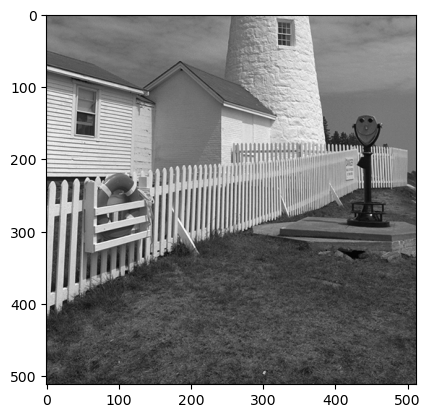

In [3]:
test_im = np.array(imread("lighthouse.png", as_gray=True))  # This time the image is floating point 0.0 to 1.0!
height, width = test_im.shape
print("Test image shape: ", test_im.shape)  # and it is grayscale
imshow(test_im)

Before starting, here is a function that creates a gaussian filter for you: you might find it handy later.

In [4]:
def gaussian_filter(size, sigma):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

slider = interactive(lambda size, sigma: imshow(gaussian_filter(size, sigma)), {'manual': True, 'manual_name': 'Update image'}, size=(1, 49, 2), sigma=(0.1, 20, 0.1))
slider.children[0].value = 9
slider.children[1].value = 2
display(slider)

interactive(children=(IntSlider(value=9, description='size', max=49, min=1, step=2), FloatSlider(value=2.0, de…

## EXERCISE 1 - PUT SOLUTION HERE

In [7]:
def thresholded_edge_detection(image, kx, ky, threshold):

    gx = convolve(image, kx)
    gy = convolve(image, ky)
    
    gradient_magnitude = np.sqrt(gx**2 + gy**2)
    
    edge_image = gradient_magnitude > threshold
    
    return edge_image, gx, gy, gradient_magnitude

def test_thresholded_edge_detection(image):

    kx_elem = np.array([[-1, 1]])
    ky_elem = np.array([[-1], [1]])
    
    kx_sobel = np.array([[-1, 0, 1],
                         [-2, 0, 2], 
                         [-1, 0, 1]])
    ky_sobel = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])
    
    kx_prewitt = np.array([[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, 1]])
    ky_prewitt = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
    
    kernels = {
        'Elementary': (kx_elem, ky_elem),
        'Sobel': (kx_sobel, ky_sobel),
        'Prewitt': (kx_prewitt, ky_prewitt)
    }
    
    thresholds = [0.1, 0.3, 0.5]
    
    fig, axes = plt.subplots(len(kernels), len(thresholds) + 1, figsize=(15, 10))
    
    for i, (name, (kx, ky)) in enumerate(kernels.items()):
        axes[i, 0].imshow(image, cmap='gray')
        axes[i, 0].set_title(f'{name} - Original')
        axes[i, 0].axis('off')
        
        for j, threshold in enumerate(thresholds):
            edge_img, _, _, _ = thresholded_edge_detection(image, kx, ky, threshold)
            axes[i, j+1].imshow(edge_img, cmap='gray')
            axes[i, j+1].set_title(f'{name} - Thresh: {threshold}')
            axes[i, j+1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return kernels

def interactive_thresholded(image):
    kernels = {
        'Elementary': (np.array([[-1, 1]]), np.array([[-1], [1]])),
        'Sobel': (np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), 
                  np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])),
        'Prewitt': (np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]), 
                    np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
    }
    
    def update_thresholded(kernel_type, threshold):
        kx, ky = kernels[kernel_type]
        edge_img, gx, gy, grad_mag = thresholded_edge_detection(image, kx, ky, threshold)
        
        fig, axes = plt.subplots(2, 2, figsize=(10, 8))
        axes[0, 0].imshow(image, cmap='gray')
        axes[0, 0].set_title('Original Image')
        axes[0, 0].axis('off')
        
        axes[0, 1].imshow(gx, cmap='gray')
        axes[0, 1].set_title('Gradient X')
        axes[0, 1].axis('off')
        
        axes[1, 0].imshow(gy, cmap='gray')
        axes[1, 0].set_title('Gradient Y')
        axes[1, 0].axis('off')
        
        axes[1, 1].imshow(edge_img, cmap='gray')
        axes[1, 1].set_title(f'Edges (Threshold: {threshold})')
        axes[1, 1].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    widget = interactive(update_thresholded,
                        kernel_type=widgets.Dropdown(options=list(kernels.keys()), value='Sobel'),
                        threshold=widgets.FloatSlider(min=0.01, max=1.0, step=0.01, value=0.3))
    
    display(widget)

## EXERCISE 2 - PUT SOLUTION HERE

In [9]:
def canny_edge_detection(image, sigma=1.0, kernel_size=5, low_threshold=0.1, high_threshold=0.2, sobel_kernel=True):
    intermediate_results = {}
    
    gaussian_kernel = gaussian_filter(kernel_size, sigma)
    blurred = convolve(image, gaussian_kernel)
    intermediate_results['blurred'] = blurred
    intermediate_results['gaussian_kernel'] = gaussian_kernel
    
    if sobel_kernel:
        kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    else:
        kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        ky = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    
    gx = convolve(blurred, kx)
    gy = convolve(blurred, ky)
    
    gradient_magnitude = np.sqrt(gx**2 + gy**2)
    gradient_direction = np.arctan2(gy, gx)  
    
    intermediate_results['gx'] = gx
    intermediate_results['gy'] = gy
    intermediate_results['gradient_magnitude'] = gradient_magnitude
    intermediate_results['gradient_direction'] = gradient_direction
    
    direction_deg = np.degrees(gradient_direction) % 180
    
    quantized_direction = np.zeros_like(direction_deg, dtype=int)
    
    mask = ((direction_deg >= 0) & (direction_deg < 22.5)) | ((direction_deg >= 157.5) & (direction_deg < 180))
    quantized_direction[mask] = 0
    
    mask = (direction_deg >= 22.5) & (direction_deg < 67.5)
    quantized_direction[mask] = 45
    
    mask = (direction_deg >= 67.5) & (direction_deg < 112.5)
    quantized_direction[mask] = 90
    
    mask = (direction_deg >= 112.5) & (direction_deg < 157.5)
    quantized_direction[mask] = 135
    
    intermediate_results['quantized_direction'] = quantized_direction
    
 
    suppressed = np.zeros_like(gradient_magnitude)
    
    for i in range(1, gradient_magnitude.shape[0]-1):
        for j in range(1, gradient_magnitude.shape[1]-1):
            direction = quantized_direction[i, j]
            mag = gradient_magnitude[i, j]
            
            if direction == 0:  # Horizontal
                neighbors = [gradient_magnitude[i, j-1], gradient_magnitude[i, j+1]]
            elif direction == 45:  # Primary diagonal
                neighbors = [gradient_magnitude[i-1, j+1], gradient_magnitude[i+1, j-1]]
            elif direction == 90:  # Vertical
                neighbors = [gradient_magnitude[i-1, j], gradient_magnitude[i+1, j]]
            else:  # 135° - Secondary diagonal
                neighbors = [gradient_magnitude[i-1, j-1], gradient_magnitude[i+1, j+1]]
            
            if mag >= max(neighbors):
                suppressed[i, j] = mag
    
    intermediate_results['nonmax_suppressed'] = suppressed
    
    def hysteresis_thresholding(img, low_thresh, high_thresh):
        strong_edges = img > high_thresh
        weak_edges = (img >= low_thresh) & (img <= high_thresh)
        
        labeled_weak, num_labels = label(weak_edges)
        
        final_edges = strong_edges.copy()
        
        for label_idx in range(1, num_labels + 1):
            weak_component = labeled_weak == label_idx
            
            from scipy.ndimage import binary_dilation
            dilated_strong = binary_dilation(strong_edges, structure=np.ones((3,3)))
            
            if np.any(weak_component & dilated_strong):
                final_edges = final_edges | weak_component
        
        return final_edges
  
    suppressed_normalized = suppressed / np.max(suppressed) if np.max(suppressed) > 0 else suppressed
    final_edges = hysteresis_thresholding(suppressed_normalized, low_threshold, high_threshold)
    
    intermediate_results['final_edges'] = final_edges
    
    return final_edges, intermediate_results

def test_canny_edge_detection(image):

    sigmas = [0.5, 1.0, 2.0]
    low_high_ratios = [(0.1, 0.2), (0.1, 0.3), (0.2, 0.4)]
    
    fig, axes = plt.subplots(len(sigmas), len(low_high_ratios) + 1, figsize=(15, 10))
    
    for i, sigma in enumerate(sigmas):
        axes[i, 0].imshow(image, cmap='gray')
        axes[i, 0].set_title(f'σ={sigma} - Original')
        axes[i, 0].axis('off')
        
        for j, (low, high) in enumerate(low_high_ratios):
            final_edges, _ = canny_edge_detection(image, sigma=sigma, low_threshold=low, high_threshold=high)
            axes[i, j+1].imshow(final_edges, cmap='gray')
            axes[i, j+1].set_title(f'σ={sigma}, Low={low}, High={high}')
            axes[i, j+1].axis('off')
    
    plt.tight_layout()
    plt.show()

def interactive_canny(image):
    """
    Interactive widget for Canny edge detection.
    """
    def update_canny(sigma, kernel_size, low_thresh, high_thresh, use_sobel, show_intermediate):
        kernel_size = kernel_size if kernel_size % 2 == 1 else kernel_size + 1  # Ensure odd size
        
        final_edges, intermediates = canny_edge_detection(
            image, sigma, kernel_size, low_thresh, high_thresh, use_sobel
        )
        
        if show_intermediate:
            fig, axes = plt.subplots(2, 4, figsize=(16, 8))
            
            axes[0, 0].imshow(image, cmap='gray')
            axes[0, 0].set_title('Original Image')
            axes[0, 0].axis('off')
            
            axes[0, 1].imshow(intermediates['blurred'], cmap='gray')
            axes[0, 1].set_title(f'Blurred (σ={sigma})')
            axes[0, 1].axis('off')
            
            axes[0, 2].imshow(intermediates['gradient_magnitude'], cmap='gray')
            axes[0, 2].set_title('Gradient Magnitude')
            axes[0, 2].axis('off')
            
            dir_display = intermediates['quantized_direction'].astype(float)
            im = axes[0, 3].imshow(dir_display, cmap='hsv')
            axes[0, 3].set_title('Quantized Directions')
            axes[0, 3].axis('off')
            plt.colorbar(im, ax=axes[0, 3])
            
            axes[1, 0].imshow(intermediates['nonmax_suppressed'], cmap='gray')
            axes[1, 0].set_title('Non-maximum Suppressed')
            axes[1, 0].axis('off')
            
            axes[1, 1].imshow(final_edges, cmap='gray')
            axes[1, 1].set_title(f'Final Edges\nLow: {low_thresh}, High: {high_thresh}')
            axes[1, 1].axis('off')
            
            # Show Gaussian kernel
            axes[1, 2].imshow(intermediates['gaussian_kernel'], cmap='hot')
            axes[1, 2].set_title(f'Gaussian Kernel\n(size={kernel_size})')
            axes[1, 2].axis('off')
            
            # Show gradient directions
            dir_plot = axes[1, 3].imshow(intermediates['gradient_direction'], cmap='hsv')
            axes[1, 3].set_title('Gradient Direction')
            axes[1, 3].axis('off')
            plt.colorbar(dir_plot, ax=axes[1, 3])
            
        else:
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            axes[0].imshow(image, cmap='gray')
            axes[0].set_title('Original Image')
            axes[0].axis('off')
            
            axes[1].imshow(final_edges, cmap='gray')
            axes[1].set_title(f'Canny Edges\nσ={sigma}, Low={low_thresh}, High={high_thresh}')
            axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    widget = interactive(update_canny,
                        sigma=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Sigma'),
                        kernel_size=widgets.IntSlider(min=3, max=15, step=2, value=5, description='Kernel Size'),
                        low_thresh=widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.1, description='Low Thresh'),
                        high_thresh=widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.2, description='High Thresh'),
                        use_sobel=widgets.Checkbox(value=True, description='Use Sobel'),
                        show_intermediate=widgets.Checkbox(value=True, description='Show Intermediate'))
    
    display(widget)

In [12]:
def create_test_image():
    image = np.zeros((200, 200))
    
    image[50:100, 50:100] = 1
    
    y, x = np.ogrid[-100:100, -100:100]
    mask = x**2 + y**2 <= 50**2
    image[mask] = 1
    
    image += 0.1 * np.random.randn(*image.shape)
    
    return image

image = create_test_image()

def perform_all_canny(image, sigma=1.0, kernel_size=5, low_threshold=0.1, high_threshold=0.2, 
                      use_sobel=True, gaussian_blur=True, nonmax_suppression=True, hysteresis=True):
   

    if gaussian_blur:
        gaussian_kernel = gaussian_filter(kernel_size, sigma)
        blurred = convolve(image, gaussian_kernel)
    else:
        blurred = image

    if use_sobel:
        kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    else:
        kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        ky = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    
    gx = convolve(blurred, kx)
    gy = convolve(blurred, ky)
    
    gradient_magnitude = np.sqrt(gx**2 + gy**2)
    gradient_direction = np.arctan2(gy, gx)
    direction_deg = np.degrees(gradient_direction) % 180
    quantized_direction = np.zeros_like(direction_deg, dtype=int)
    
    mask = ((direction_deg >= 0) & (direction_deg < 22.5)) | ((direction_deg >= 157.5) & (direction_deg < 180))
    quantized_direction[mask] = 0
  
    mask = (direction_deg >= 22.5) & (direction_deg < 67.5)
    quantized_direction[mask] = 45
    
    mask = (direction_deg >= 67.5) & (direction_deg < 112.5)
    quantized_direction[mask] = 90

    mask = (direction_deg >= 112.5) & (direction_deg < 157.5)
    quantized_direction[mask] = 135
    
    if nonmax_suppression:
        suppressed = np.zeros_like(gradient_magnitude)
        
        for i in range(1, gradient_magnitude.shape[0]-1):
            for j in range(1, gradient_magnitude.shape[1]-1):
                direction = quantized_direction[i, j]
                mag = gradient_magnitude[i, j]
                
                if direction == 0:  
                    neighbors = [gradient_magnitude[i, j-1], gradient_magnitude[i, j+1]]
                elif direction == 45:  
                    neighbors = [gradient_magnitude[i-1, j+1], gradient_magnitude[i+1, j-1]]
                elif direction == 90:  
                    neighbors = [gradient_magnitude[i-1, j], gradient_magnitude[i+1, j]]
                else:  
                    neighbors = [gradient_magnitude[i-1, j-1], gradient_magnitude[i+1, j+1]]
                
                if mag >= max(neighbors):
                    suppressed[i, j] = mag
    else:
        suppressed = gradient_magnitude
    
    if hysteresis:
        def hysteresis_thresholding(img, low_thresh, high_thresh):
            strong_edges = img > high_thresh
            weak_edges = (img >= low_thresh) & (img <= high_thresh)
            
            labeled_weak, num_labels = label(weak_edges)
            
            final_edges = strong_edges.copy()
            
            for label_idx in range(1, num_labels + 1):
                weak_component = labeled_weak == label_idx
                
                from scipy.ndimage import binary_dilation
                dilated_strong = binary_dilation(strong_edges, structure=np.ones((3,3)))
                
                if np.any(weak_component & dilated_strong):
                    final_edges = final_edges | weak_component
            
            return final_edges
        
        suppressed_normalized = suppressed / np.max(suppressed) if np.max(suppressed) > 0 else suppressed
        final_edges = hysteresis_thresholding(suppressed_normalized, low_threshold, high_threshold)
    else:
        suppressed_normalized = suppressed / np.max(suppressed) if np.max(suppressed) > 0 else suppressed
        final_edges = suppressed_normalized > low_threshold
    
    return final_edges

slider = interactive(
    lambda sigma, kernel_size, low_threshold, high_threshold, use_sobel, gaussian_blur, nonmax_suppression, hysteresis: 
    imshow(perform_all_canny(image, sigma, kernel_size, low_threshold, high_threshold, use_sobel, gaussian_blur, nonmax_suppression, hysteresis)), 
    {'manual': True, 'manual_name': 'Update Canny Edges'}, 
    sigma=(0.1, 5.0, 0.1),
    kernel_size=(3, 15, 2),
    low_threshold=(0.01, 0.5, 0.01),
    high_threshold=(0.01, 0.5, 0.01),
    use_sobel=True,
    gaussian_blur=True,
    nonmax_suppression=True,
    hysteresis=True
)

slider.children[0].value = 1.0    # sigma
slider.children[1].value = 5      # kernel_size
slider.children[2].value = 0.1    # low_threshold
slider.children[3].value = 0.2    # high_threshold
slider.children[4].value = True   # use_sobel
slider.children[5].value = True   # gaussian_blur
slider.children[6].value = True   # nonmax_suppression
slider.children[7].value = True   # hysteresis

display(slider)

interactive(children=(FloatSlider(value=1.0, description='sigma', max=5.0, min=0.1), IntSlider(value=5, descri…

## SAMPLE EXAM QUESTION

![alt text](Q1.png "Question 1")

![alt text](Q2.png "Question 2")

![alt text](F2.png "Figure 4")

## Contact

We've included our contact details here in case you are solving this from home and you want to ask a question! Feel free to email us.

Name: Xiaozhong Lyu<br>
E-mail: xiaozhong.lyu@inf.ethz.ch<br>

If your question is very much code-related, we suggest you to make your notebook public and link it to us in your question, so that we can work it out better!